In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import mean
import seaborn as sns
x = pd.read_csv('C:/Users/Marcy/Documents/Entity Coursework/Final Project/Train_and_test sets/x.csv') 
y = pd.read_csv ('C:/Users/Marcy/Documents/Entity Coursework/Final Project/Train_and_test sets/y.csv')


In [2]:
df = pd.concat([x, y])

#### For creating graphs, add the two datasets back into one - df. Then check.

In [3]:
df.isna().sum()

MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
Street           1460
                 ... 
ScreenPorch      1460
PoolArea         1460
MiscVal          1460
SaleCondition    1460
SalePrice        1460
Length: 61, dtype: int64

#### What is the average sale price of a home?

In [4]:
df['SalePrice'].mean()

180921.19589041095

#### There were some null values in the second half of the dataset, so for purposes of graphing, I filled the cells with the average sale price. 

In [5]:
df['SalePrice'].fillna(value=180921, inplace=True)

In [6]:
df['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

#### Copied over the top features as identified in stepwise regression.

#### Top Features
SalePriceRange + OverallQual + GrLivArea + YearBuilt + OverallCond + GarageCars + FireplaceQu + RoofMatl + BsmtFullBath + BldgType + KitchenQual + LotArea + Functional + GarageType + HeatingQC + ScreenPorch + SaleCondition + MSZoning + GarageYrBlt + KitchenAbvGr + Street + WoodDeckSF + Fireplaces + BsmtQual + X1stFlrSF + BsmtFinType1 + GarageFinish + FullBath + LotFrontage + BsmtHalfBath

#### Created a new data set - HouseClean, with no null values. 

In [7]:
df = pd.read_csv("C:/Users/Marcy/Documents/HouseClean.csv")
#Pearson Correlation Heatmap
df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,YearRemodAdd - YearBuilt
Unnamed: 0,1.0,0.011,-0.0061,-0.0096,-0.033,0.0089,0.05,0.022,0.018,-0.028,0.013,-0.013,-0.022,0.039,-0.023,-0.035,-0.043,0.055,0.0017,0.03,0.0085,0.048,0.0055,0.014,-0.005,0.043,-0.006,-0.0079,-0.015,0.042,0.0022,0.0098,0.039,0.01,0.0056,-0.044,0.0083,0.0023,-0.02,0.0056,0.0068,0.038,0.003,-0.0044,0.027,-0.0011,-0.02,0.0076,0.017,0.018,-0.0077,-0.022,0.006,-0.03,-0.00048,0.0029,-0.047,0.0013,0.057,-0.0062,-0.0058,-0.022,-0.0029
MSSubClass,0.011,1.0,0.036,-0.36,-0.14,-0.025,0.076,0.75,0.4,0.033,-0.059,0.028,0.041,-0.12,-0.031,-0.089,-0.14,-0.033,-0.017,-0.0033,0.058,-0.037,-0.0095,0.018,-0.07,0.042,-0.066,-0.14,-0.24,0.048,0.021,-0.1,0.052,-0.25,0.31,0.046,0.075,0.0035,-0.0023,0.13,0.18,-0.023,0.28,0.01,0.04,0.0037,-0.046,0.058,-0.04,-0.099,0.037,0.037,-0.06,-0.013,-0.0061,-0.012,-0.044,-0.026,0.0083,-0.0077,-0.025,-0.084,-0.00014
MSZoning,-0.0061,0.036,1.0,-0.11,-0.034,0.088,-0.0099,0.0057,-0.11,-0.16,0.19,-0.31,-0.17,-0.0003,0.0051,-0.0086,0.007,-0.049,0.2,-0.096,-0.24,0.13,-0.007,0.025,-0.049,-0.029,0.028,-0.047,-0.088,0.057,0.13,-0.05,-0.071,-0.056,-0.051,0.012,-0.083,-0.019,0.0072,-0.2,-0.13,-0.016,0.049,0.13,-0.043,-0.096,-0.011,0.017,-0.16,-0.19,-0.12,-0.05,-0.1,-0.0095,-0.15,0.12,0.00036,0.019,-0.0031,0.0093,0.0095,-0.17,0.23
LotFrontage,-0.0096,-0.36,-0.11,1.0,0.31,-0.037,-0.18,-0.41,0.032,0.23,-0.053,0.12,0.083,0.15,0.082,0.074,0.099,-0.017,-0.18,0.048,0.099,-0.17,0.043,-0.027,0.22,-0.03,0.043,0.12,0.36,-0.021,-0.08,0.069,0.06,0.41,0.072,0.037,0.37,0.091,-0.0064,0.18,0.048,0.24,-0.0058,-0.19,0.32,0.03,0.24,-0.19,0.27,0.32,0.013,-0.00048,0.089,0.077,0.14,0.0098,0.062,0.038,0.18,0.0012,0.058,0.33,-0.075
LotArea,-0.033,-0.14,-0.034,0.31,1.0,-0.2,-0.12,-0.21,-0.033,0.11,-0.0056,0.014,0.014,0.077,0.15,0.0043,-0.0039,-0.0049,-0.057,0.015,-0.011,-0.066,0.0073,-0.062,0.21,-0.071,0.11,-0.0026,0.26,0.028,0.0042,0.05,0.044,0.3,0.051,0.0048,0.26,0.16,0.048,0.13,0.014,0.12,-0.018,-0.057,0.19,-0.022,0.27,-0.15,0.15,0.18,-0.01,-0.0047,0.015,0.17,0.085,-0.018,0.02,0.043,0.078,0.038,0.034,0.26,-0.0059
Street,0.0089,-0.025,0.088,-0.037,-0.2,1.0,0.014,-0.018,0.024,0.059,0.043,0.021,0.065,-0.02,0.0081,0.0025,0.0062,0.011,0.05,0.0059,0.035,-0.026,-0.015,-0.012,-0.016,0.062,-0.038,0.035,0.0051,0.0079,-0.054,0.07,0.021,0.0059,0.047,0.0077,0.044,-0.051,0.015,0.046,0.028,0.029,0.014,-0.025,0.047,-0.016,-0.0053,-0.024,-0.02,-0.048,-0.024,-0.023,0.025,-0.018,-0.0057,0.023,0.0075,-0.033,0.0044,-0.023,0.0061,0.041,0.029
LotConfig,0.05,0.076,-0.0099,-0.18,-0.12,0.014,1.0,0.11,-0.033,-0.031,-0.031,0.014,-0.0052,-0.01,-0.068,0.023,0.0055,0.0029,-0.0025,0.035,-0.012,0.023,0.035,0.019,-0.024,0.0001,-0.01,-0.011,-0.04,-2.4e-05,-0.01,-0.0037,-0.025,-0.062,-0.052,-0.005,-0.089,-0.013,-0.0099,-0.0075,-0.026,-0.057,-0.0025,-0.01,-0.049,-0.021,-0.061,0.021,-0.067,-0.064,0.033,0.042,-0.045,-0.036,-0.055,-0.07,-0.03,-0.0047,-0.047,-0.018,0.052,-0.067,-0.021
BldgType,0.022,0.75,0.0057,-0.41,-0.21,-0.018,0.11,1.0,0.067,0.05,-0.16,0.22,0.1,-0.054,-0.038,-0.11,-0.14,-0.028,-0.088,0.085,0.14,-0.097,0.041,-0.042,0.007,0.031,-0.017,-0.051,-0.05,0.0055,-0.01,0.018,0.074,-0.074,-0.084,-0.03,-0.13,0.052,-0.0034,0.071,-0.0076,-0.28,0.18,-0.025,-0.2,0.0096,-0.09,0.042,0.0074,-0.061,0.073,0.068,0.059,-0.013,-0.037,-0.11,-0.023,-0.028,-0.028,-0.0096,-0.0035,-0.086,-0.18
HouseStyle,0.018

#### Bar graph of quartiles for the year a house was remodeled, just to see.

<AxesSubplot:>

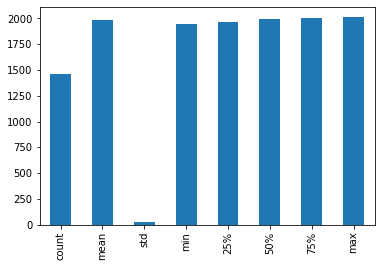

In [8]:
df['YearRemodAdd'].describe().plot.bar()

#### Summary statistic showing the earliest year a home was built (1872), the mean, and each quartile to the latest year - 2010.

In [9]:
df['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

<AxesSubplot:>

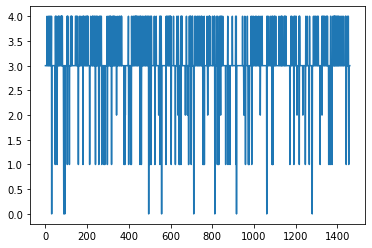

In [10]:
df['MSZoning'].plot()

#### Above plot is just investigatory. Below is a scatter plot of Year Remodeled vs. Year Built. 

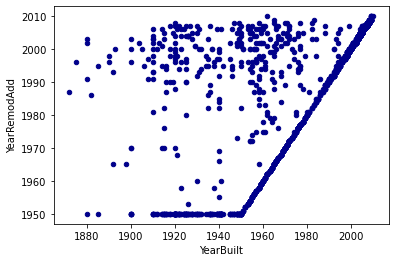

In [11]:
ax1 = df.plot.scatter(x='YearBuilt',
                    y='YearRemodAdd',
                     c='DarkBlue')
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/builtRemodFig.png')

#### Below is a scatter plot 
showing the size of the yard vs the above grade square footage of a home. In other words, how big are the yards for different sized houses?

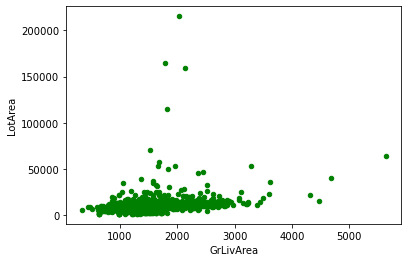

In [12]:
ax2 = df.plot.scatter(x='GrLivArea',
                     y='LotArea', c='green')
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/yardSFhouseFig.png')

#### Number of full baths
for the houses in the dataset. The average house has 1.5 baths, with 3 being the most these homes had.

In [13]:
df['FullBath'].describe()

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64

#### How many 2-bathroom houses are in this dataset?

In [14]:
df['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

#### Do bigger houses have more bathrooms? Yes. Yes they do. 

<AxesSubplot:xlabel='FullBath', ylabel='GrLivArea'>

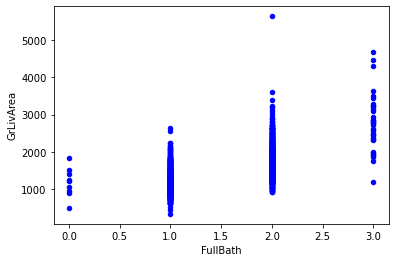

In [15]:
df.plot.scatter(x='FullBath', 
               y='GrLivArea', color='blue')

#### What kind of house doesn't have a full bathroom?
There are nine in the dataset that don't have full baths - which houses are these? Were they built in the 1890s?

In [16]:
df.loc[df.FullBath == 0]

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotConfig,BldgType,HouseStyle,OverallQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,YearRemodAdd - YearBuilt
53,53,20,3,68.00,50271,1,4,0,2,9,...,857,72,0,0,0,0,0,4,385000,6
188,188,90,3,64.00,7018,1,4,2,6,5,...,120,0,0,0,0,0,0,2,153337,0
375,375,30,3,70.05,10020,1,4,0,2,1,...,0,0,0,0,0,0,0,4,61000,28
597,597,120,3,53.00,3922,1,4,4,2,7,...,120,16,0,0,0,0,0,5,194201,1
634,634,90,3,64.00,6979,1,4,2,6,6,...,264,56,0,0,0,0,600,4,144000,0
916,916,20,0,50.00,9000,1,4,0,2,2,...,0,0,0,0,0,0,0,0,35311,1
1163,1163,90,3,60.00,12900,1,4,2,6,4,...,120,0,0,0,0,0,0,2,108959,0
1213,1213,80,3,70.05,10246,1,1,0,7,4,...,88,0,0,0,0,0,0,4,145000,36
1270,1270,40,3,70.05,23595,1,4,0,2,7,...,268,0,0,0,0,0,0,4,260000,0


#### After taking a look at the data
it appears the zeroes are likely null values. 

#### How many bedrooms do these homes have?
How are they distributed? 

In [17]:
df['BedroomAbvGr'].describe()

count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

#### What kind of house has 8 bedrooms, and what was the sale price?

In [18]:
df.loc[df.BedroomAbvGr == 8]

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotConfig,BldgType,HouseStyle,OverallQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,YearRemodAdd - YearBuilt
635,635,190,2,60.0,10896,1,4,1,3,6,...,0,110,0,0,0,0,0,0,200000,81


#### This house is a
2-family conversion, zoned commercial, with 60 feet of property along the road (this is house wide the lot is at the road), with an overall rating of 7/10, 110 SF enclosed porch, no pool. Sale Price wasn't available for this unit. 

#### How many
3-bedroom homes are in this dataset?

In [19]:
df['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

#### The majority of homes
have 3 bedrooms above grade, meaning at ground floor or on an upper floor if the home is multi-story. This is a family town, makes sense. 

#### how many years between when a house is built and it's remodeled?

#### There were a few null values - either because the home had never been remodeled, or that information wasn't available.
Without knowing the full history of the homes, I opted to add an average in to replace null values. 

In [20]:
df['YearRemodAdd'].mean()

1984.8657534246574

In [21]:
df['YearRemodAdd'].fillna(value=1984)

0       2003
1       1976
2       2002
3       1970
4       2000
        ... 
1455    2000
1456    1988
1457    2006
1458    1996
1459    1965
Name: YearRemodAdd, Length: 1460, dtype: int64

#### To address the null values
in second half of dataset - for purposes of graphing, I took average year and filled in to null values. Then I subtracted the year a house was remodeled from the year it was built for the number of years it took for an owner to remodel their home. 

In [22]:
df['YearRemodAdd - YearBuilt'] = df.YearRemodAdd - df.YearBuilt

df

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotConfig,BldgType,HouseStyle,OverallQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,YearRemodAdd - YearBuilt
0,0,60,3,65.0,8450,1,4,0,5,7,...,0,61,0,0,0,0,0,4,208500,0
1,1,20,3,80.0,9600,1,2,0,2,6,...,298,0,0,0,0,0,0,4,181500,0
2,2,60,3,68.0,11250,1,4,0,5,7,...,0,42,0,0,0,0,0,4,223500,1
3,3,70,3,60.0,9550,1,0,0,5,7,...,0,35,272,0,0,0,0,0,140000,55
4,4,60,3,84.0,14260,1,2,0,5,8,...,192,84,0,0,0,0,0,4,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60,3,62.0,7917,1,4,0,5,6,...,0,40,0,0,0,0,0,4,175000,1
1456,1456,20,3,85.0,13175,1,4,0,2,6,...,349,0,0,0,0,0,0,4,210000,10
1457,1457,70,3,66.0,9042,1,4,0,5,7,...,0,60,0,0,0,0,2500,4,266500,65
1458,1458,20,3,68.0,9717,1,4,0,2,5,...,366,0,112,0,0,0,0,4,142125,46


In [23]:
pd.set_option("display.max_rows", 90)
df['YearRemodAdd - YearBuilt'].mean()

13.597945205479451

#### From the values
I do have, it is an average of 13.6 years from when a house is first built to its first remodel. 

#### Does kitchen quality correlate with SalePrice?

In [24]:
df['KitchenQual'].corr(df['SalePrice'])

-0.5891887782994204

#### Is it true people desire living in a culdesac? Does this correlate with a higher sale price?

In [25]:
df['LotConfig'].corr(df['SalePrice'])

-0.06739602315941737

In [26]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotConfig', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SaleCondition', 'SalePrice', 'YearRemodAdd - YearBuilt'],
      dtype='object')

In [27]:
df['OverallQual'].corr(df['SalePrice'])

0.7909816005838052

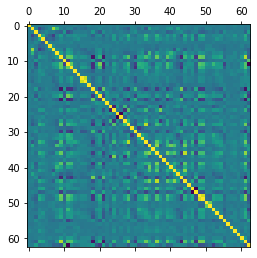

In [28]:
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.show()